##  **Problem 1 [10 Pts]**
This question tests your ability to follow instructions. If you follow the instructions for this assignment, you will receive full credit for this question. 
a. List the names of your group [2 pts] 
b. Type your answers (meaning you did not submit your assignment written by hand) [2 pts] 
c. Format your assignment in the form of a write-up, not simply code that you submit (including proper formatting and labelling of tables and graphs) [2 pts] 
d. Provide the supporting Python code for your answers [2 pt] e. Your Python code actually works on its own and provides the answers that you submitted in your write-up [2 pts]

Group members: Ge Aaron, Weng Danni , Sun Haotong

## **Problem 3 [35 Pts], Simulations** 
For this question, in order to get credit, you will need to 1) write the functions and 2) interpret the results obtained from the functions you wrote. Make sure to provide context for your interpretation of the result: meaning just writing “I got an answer of 1.21029” will not get you any credit for your interpretation. You need to tell me what the result means in the context of what we discuss in this course. 

a. Write a function that accepts [10 pts]: • an object of type BitGenerator, BG • a positive integer degrees and returns • a 1-D array of 200 i.i.d. draws from a studentt distribution with degrees degrees of freedom. Do not seed the BitGenerator in your function. 

In [1]:
from numpy.random import Generator, PCG64
def draw_samples_a(BG, degrees):
    # Create a random number generator using the provided BitGenerator
    rng = Generator(BG)

    # Generate 200 i.i.d. draws from a Student's t-distribution with the specified degrees of freedom
    samples = rng.standard_t(df=degrees, size=200)

    return samples


# Example usage:
bg = PCG64()  # Create a BitGenerator instance
draws = draw_samples_a(
    bg, 6
)  # Generate 200 i.i.d. draws from a t-distribution with 10 degrees of freedom
print(draws)  # Print the generated samples

[ 4.15980584e+00  1.08538869e+00 -9.14643902e-01  1.39354733e-01
  1.64568047e+00  1.45070392e+00  7.10948872e-01 -1.00228611e+00
 -6.03351064e-01  1.81256592e+00 -9.40078342e-01  1.71385987e+00
  5.32974558e-01 -9.23679210e-01 -1.24558726e+00  1.03895535e+00
 -6.89299725e-01  3.64566386e-02  4.70082448e-01  6.15315735e-01
  7.68918095e-01  3.14271978e+00  3.80881811e-02 -1.44047752e-02
 -5.13115184e-03 -9.77114252e-01 -3.23333108e-01  8.06685203e-01
 -4.17357292e-01 -4.41620994e-01 -3.29175314e-01  1.10558120e+00
 -1.07006223e+00  4.79277200e-01 -1.72190937e-01  1.48630316e-01
 -3.05942538e+00 -9.86788373e-01  3.30120847e-02 -4.74399211e-01
 -1.01373528e+00 -5.44859338e-02  3.59244518e-01  3.76654901e+00
 -5.47261653e-01 -1.34133224e+00  1.51201349e+00 -1.30608596e+00
 -6.96488035e-01  3.77477215e-02  3.53005680e-01  9.14609541e-01
  1.72133688e+00  1.08542771e+00  3.29848870e+00 -6.28104634e-01
 -1.01820767e-01 -9.27168280e-01  1.41059706e+00  4.94671015e-01
 -7.48568864e-01  1.39940

b. Write a function that accepts [5 pts]: 
• a BitGenerator bg • a 1-D array, a • a boolean, r and returns • a 1-D array of the same size as a that contains values randomly drawn from a • those values are randomly drawn with replacement if replace = T rue and otherwise are drawn without replacement (i.e. they are “shuffled.”) 

In [4]:
# b)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
def draw_values_b(bg, a, r):
    # Create a random number generator using the provided BitGenerator
    rngb = Generator(bg)

    # Generate a 1-D array of values randomly drawn from a
    # If replace is True, values are drawn with replacement
    # If replace is False, values are drawn without replacement
    drawn_values_b = rngb.choice(a, size=a.shape[0], replace=r)

    return drawn_values_b


# Example usage:
bg = PCG64()
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
drawn_values_b_t = draw_values_b(bg, a, True)
drawn_values_b_f = draw_values_b(bg, a, False)
print(drawn_values_b_f)  # Print the generated samples
print(drawn_values_b_t)  # Print the generated samples


[ 6  3  9  1 10  2  5  7  4  8]
[ 1 10  8  3  5  3  7  3  6 10]


c. Write a function that accepts a 1-D array s and produces a probability plot comparing its values to a N (0, 1) distribution. [5 pts] 

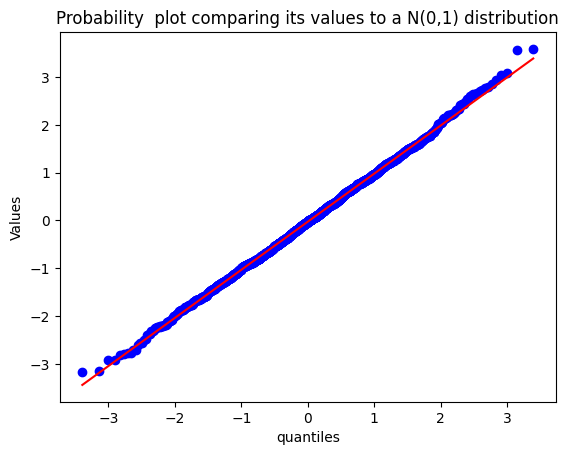

In [5]:
# c)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


def probability_plot(s):
    # Generate a probability plot
    stats.probplot(s, dist="norm", plot=plt)

    # Set the title and labels
    plt.title("Probability  plot comparing its values to a N(0,1) distribution")
    plt.xlabel("quantiles")
    plt.ylabel("Values")

    # Show the plot
    plt.show()


# Example usage:
s = np.random.normal(
    0, 1, 2000
)  
probability_plot(s)  

d. Write a function that accepts [5 pts]: • a BitGenerator bg • a 1-D array of real values a • a positive integer T and then • bootstraps (samples with replacement) from a • calculates the Kolmogorov-Smirnov test statistic for the H0 that the bootstrapped values follow a N (0, 1) distribution • repeats the above two steps T times. The function then returns• p a real value scalar 0 ≤ p ≤ 1, the fraction of the T simulations where we reject H0 at the 5% significance level. SUGGESTION: You could use Q2 Sample() to do the bootstrapping 

In [6]:
# d)

from numpy.random import Generator, PCG64
import scipy.stats as stats

def bootstrap_test(bg, a, T):

    rng_d = Generator(bg)
    
    # Initialize the count of rejections
    rejections = 0
    
    # Repeat the bootstrap procedure and the Kolmogorov-Smirnov test T times
    for _ in range(T):
        # Bootstrap from a
        bootstrapped_values = rng_d.choice(a, size=a.shape[0], replace=True)
        
        # Calculate the Kolmogorov-Smirnov test statistic
        D, p = stats.kstest(bootstrapped_values, 'norm')
        
        # If the p-value is less than 0.05, reject H0
        if p < 0.05:
            rejections += 1
    
    # Calculate the fraction of the T simulations where we reject H0 at the 5% significance level
    p = rejections / T
    
    return p

# Example usage:
bg = PCG64()  
a = np.random.normal(0, 1, 2000)  
T = 1000  
p = bootstrap_test(bg, a, T)  
print(p)

0.218
